## Global Solution

Notebook de resolução do problema proposto.

# Sua turma: 4SIR
# Seu nome1: Felipe Nunes Pereira Leite RM: 88254
# Seu nome2: Marcio Yukio Takarabe RM:86662

### 0. DECLARAÇÃO DE IMPORTS

In [10]:
# Realizando os imports
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from google.colab import drive

### 1. CONECTAR AO GOOGLE DRIVE


In [11]:
drive.mount('/content/drive')

# Vamos definir o caminho onde o modelo será salvo no Google Drive
model_save_path = '/content/drive/MyDrive/checkpoints/bestmodel/best_model.h5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. PEGAR DADOS DA PASTA

In [12]:
image_height, image_width = 128, 128
batch_size = 100
dataset_dir = '/content/drive/MyDrive/checkpoints/dataset-4sir'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 739 images belonging to 2 classes.
Found 184 images belonging to 2 classes.
Found 923 images belonging to 2 classes.


### 3. DEFINIR O MODELO

In [13]:
# Definição do modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16257152  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                      

### 4. Configurando Callbacks

In [14]:
# Gerenciando os callbacks
callbacks = ModelCheckpoint(
    filepath=model_save_path,
    save_best_only=True,  # Salva apenas o melhor modelo
    verbose=1  # Mostra mensagens sobre o salvamento do modelo
)

### 5. TREINANDO O MODELO

---



In [15]:
# Treinamento do modelo
hist = model.fit(
    train_generator,
    epochs=32,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples,
    callbacks=[callbacks],
    verbose=1,
    shuffle=True
)

Epoch 1/32
8/8 [==============================] - ETA: 0s - loss: 6.1240 - accuracy: 0.5318


Epoch 1: val_loss improved from inf to 2.64235, saving model to /content/drive/MyDrive/checkpoints/bestmodel/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 33s 4s/step - loss: 6.1240 - accuracy: 0.5318 - val_loss: 2.6424 - val_accuracy: 0.5109
Epoch 2/32
8/8 [==============================] - ETA: 0s - loss: 1.1953 - accuracy: 0.6779

8/8 [==============================] - 4s 443ms/step - loss: 1.1953 - accuracy: 0.6779
Epoch 3/32
8/8 [==============================] - ETA: 0s - loss: 0.5401 - accuracy: 0.7415

8/8 [==============================] - 3s 456ms/step - loss: 0.5401 - accuracy: 0.7415
Epoch 4/32
8/8 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.7456

8/8 [==============================] - 3s 335ms/step - loss: 0.5192 - accuracy: 0.7456
Epoch 5/32
8/8 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7618

8/8 [==============================] - 3s 340ms/step - loss: 0.4971 - accuracy: 0.7618
Epoch 6/32
8/8 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.7700

8/8 [==============================] - 3s 397ms/step - loss: 0.4614 - accuracy: 0.7700
Epoch 7/32
8/8 [==============================] - ETA: 0s - loss: 0.4252 - accuracy: 0.8024

8/8 [==============================] - 3s 372ms/step - loss: 0.4252 - accuracy: 0.8024
Epoch 8/32
8/8 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8309

8/8 [==============================] - 3s 337ms/step - loss: 0.3891 - accuracy: 0.8309
Epoch 9/32
8/8 [==============================] - ETA: 0s - loss: 0.3724 - accuracy: 0.8484

8/8 [==============================] - 3s 384ms/step - loss: 0.3724 - accuracy: 0.8484
Epoch 10/32
8/8 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.8606

8/8 [==============================] - 3s 431ms/step - loss: 0.3366 - accuracy: 0.8606
Epoch 11/32
8/8 [==============================] - ETA: 0s - loss: 0.3079 - accuracy: 0.8714

8/8 [==============================] - 3s 392ms/step - loss: 0.3079 - accuracy: 0.8714
Epoch 12/32
8/8 [==============================] - ETA: 0s - loss: 0.2803 - accuracy: 0.8958

8/8 [==============================] - 3s 348ms/step - loss: 0.2803 - accuracy: 0.8958
Epoch 13/32
8/8 [==============================] - ETA: 0s - loss: 0.2462 - accuracy: 0.9066

8/8 [==============================] - 3s 342ms/step - loss: 0.2462 - accuracy: 0.9066
Epoch 14/32
8/8 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9202

8/8 [==============================] - 3s 401ms/step - loss: 0.2271 - accuracy: 0.9202
Epoch 15/32
8/8 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9283

8/8 [==============================] - 4s 431ms/step - loss: 0.2056 - accuracy: 0.9283
Epoch 16/32
8/8 [==============================] - ETA: 0s - loss: 0.1885 - accuracy: 0.9337

8/8 [==============================] - 3s 389ms/step - loss: 0.1885 - accuracy: 0.9337
Epoch 17/32
8/8 [==============================] - ETA: 0s - loss: 0.1876 - accuracy: 0.9350

8/8 [==============================] - 3s 343ms/step - loss: 0.1876 - accuracy: 0.9350
Epoch 18/32
8/8 [==============================] - ETA: 0s - loss: 0.1670 - accuracy: 0.9499

8/8 [==============================] - 3s 346ms/step - loss: 0.1670 - accuracy: 0.9499
Epoch 19/32
8/8 [==============================] - ETA: 0s - loss: 0.1418 - accuracy: 0.9526

8/8 [==============================] - 3s 406ms/step - loss: 0.1418 - accuracy: 0.9526
Epoch 20/32
8/8 [==============================] - ETA: 0s - loss: 0.1301 - accuracy: 0.9608

8/8 [==============================] - 3s 342ms/step - loss: 0.1301 - accuracy: 0.9608
Epoch 21/32
8/8 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9729

8/8 [==============================] - 3s 383ms/step - loss: 0.1183 - accuracy: 0.9729
Epoch 22/32
8/8 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 0.9689

8/8 [==============================] - 3s 393ms/step - loss: 0.1134 - accuracy: 0.9689
Epoch 23/32
8/8 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9729

8/8 [==============================] - 3s 340ms/step - loss: 0.1064 - accuracy: 0.9729
Epoch 24/32
8/8 [==============================] - ETA: 0s - loss: 0.0976 - accuracy: 0.9662

8/8 [==============================] - 3s 339ms/step - loss: 0.0976 - accuracy: 0.9662
Epoch 25/32
8/8 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9838

8/8 [==============================] - 3s 418ms/step - loss: 0.0864 - accuracy: 0.9838
Epoch 26/32
8/8 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9770

8/8 [==============================] - 3s 351ms/step - loss: 0.0819 - accuracy: 0.9770
Epoch 27/32
8/8 [==============================] - ETA: 0s - loss: 0.0772 - accuracy: 0.9783

8/8 [==============================] - 3s 345ms/step - loss: 0.0772 - accuracy: 0.9783
Epoch 28/32
8/8 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9824

8/8 [==============================] - 3s 348ms/step - loss: 0.0714 - accuracy: 0.9824
Epoch 29/32
8/8 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9824

8/8 [==============================] - 3s 468ms/step - loss: 0.0720 - accuracy: 0.9824
Epoch 30/32
8/8 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9797

8/8 [==============================] - 3s 348ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 31/32
8/8 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9851

8/8 [==============================] - 3s 357ms/step - loss: 0.0569 - accuracy: 0.9851
Epoch 32/32
8/8 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9851

8/8 [==============================] - 3s 352ms/step - loss: 0.0553 - accuracy: 0.9851


### 6. Avaliando o treinamento


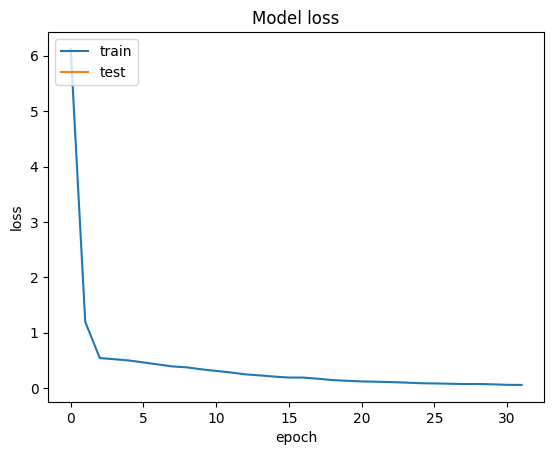

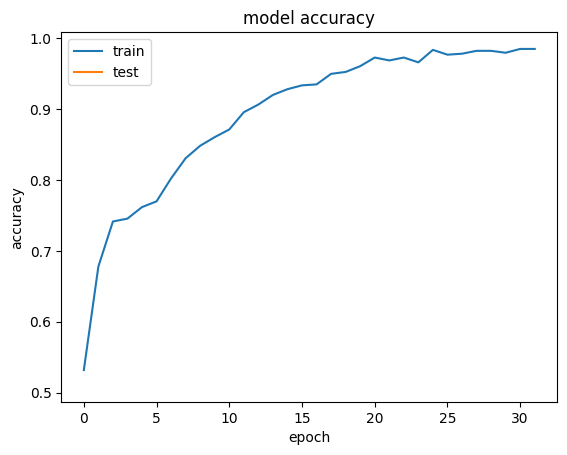

In [16]:
from matplotlib import pyplot as plt

## exibe history com plot de loss e
#acuracia
def plot_history(history):
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_history(hist)

### 7. Avaliação do Modelo


In [17]:
# Avaliação a acuracia do modelo X o conjunto de testes
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

10/10 [==============================] - 4s 356ms/step - loss: 0.2125 - accuracy: 0.9252
Test Accuracy: 0.9252437949180603


### 8. Matriz de confusão

10/10 [==============================] - 3s 339ms/step


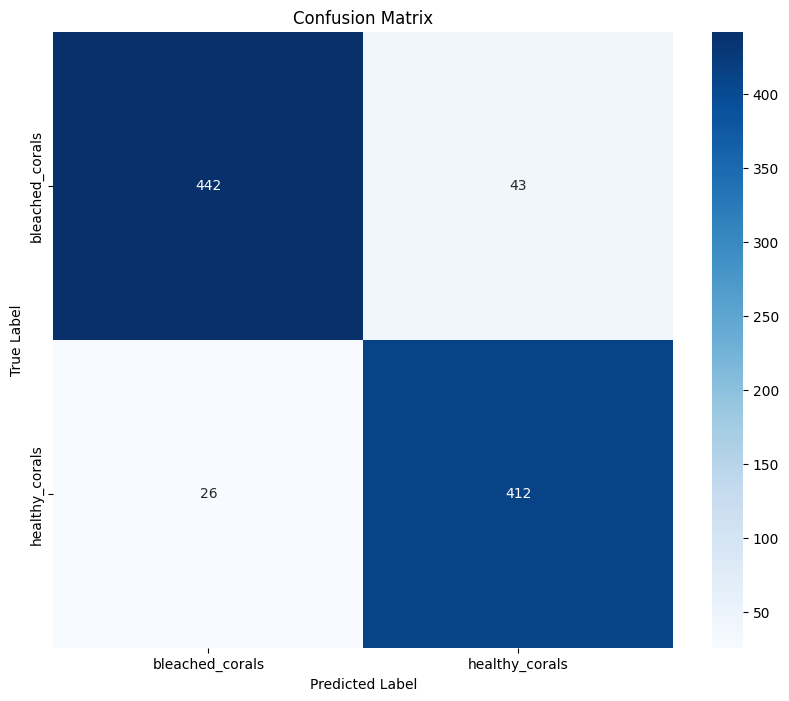

In [19]:
# Fazer previsões no conjunto de teste
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes reais
true_classes = test_generator.classes

# Mapear índices de classe para nomes de classe
class_labels = list(test_generator.class_indices.keys())

# Matriz de confusão
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### 9. Exibindo os resultados


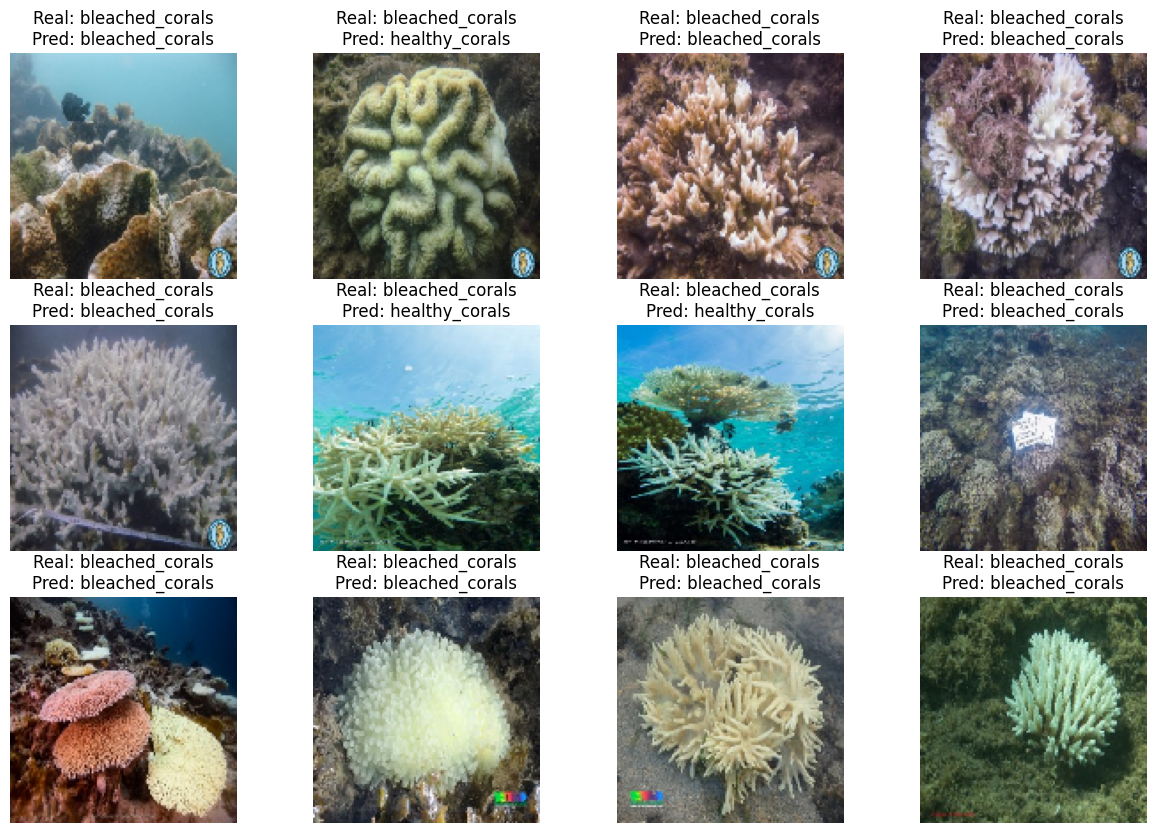

In [22]:
# Função para exibir imagens com rótulos reais e previstos
def plot_images(images, labels, preds, class_labels):
    plt.figure(figsize=(15, 10))
    for i in range(min(len(images), 12)):  # Exibir até 12 imagens
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i])
        plt.title(f"Real: {class_labels[labels[i]]}\nPred: {class_labels[preds[i]]}")
        plt.axis('off')
    plt.show()

# Carregar algumas imagens de teste para visualização
test_images, test_labels = next(test_generator)
test_images = test_images.astype('float32')

# Exibir as imagens com rótulos reais e previstos
plot_images(test_images, true_classes[:batch_size], predicted_classes[:batch_size], class_labels)